In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import json
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score, accuracy_score, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, cross_validate
import matplotlib.pyplot as plt
import nltk, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import re
import numpy as np
import pymorphy2
from collections import defaultdict
from datetime import datetime

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import ElasticNet

# В качестве сайта был выбран https://www.banki.ru/services/responses/bank/tcs/?page=1&is_countable=on

# Банк: Тинькофф, Услуги: Все, Отзывы: Проверенные, Оценка: Любая оценка

Загрузка страниц и получение словаря из json структуры, добавление в список, содержащий информацию об всех отзывах

In [ ]:
%%time
url = "https://www.banki.ru/services/responses/bank/tcs/?page=1&is_countable=on"
err = 0
i = 1
review_all = []
while err != 1:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html")
    review_info = soup.find_all("script", type="application/ld+json")[0].text.replace('&lt;p&gt;', '').replace('&lt;br&gt;', '').replace('&lt;/p&gt;', ' ').replace('\r', '').replace('\n', '').replace('\t', '').replace('\\', '').replace('\xa0', '')
    review_info = json.loads(review_info)
    if len(review_info['review']) == 0:
        err = 1
    else:
        review_all.append(review_info)
        print(f'Страница {i} обработана')
        i += 1
        url = f"https://www.banki.ru/services/responses/bank/tcs/?page={i}&is_countable=on"
        review_all.append(review_info)

Страница 1 обработана
Страница 2 обработана
Страница 3 обработана
Страница 4 обработана
Страница 5 обработана
Страница 6 обработана
Страница 7 обработана
Страница 8 обработана
Страница 9 обработана
Страница 10 обработана
Страница 11 обработана
Страница 12 обработана
Страница 13 обработана
Страница 14 обработана
Страница 15 обработана
Страница 16 обработана
Страница 17 обработана
Страница 18 обработана
Страница 19 обработана
Страница 20 обработана
Страница 21 обработана
Страница 22 обработана
Страница 23 обработана
Страница 24 обработана
Страница 25 обработана
Страница 26 обработана
Страница 27 обработана
Страница 28 обработана
Страница 29 обработана
Страница 30 обработана
Страница 31 обработана
Страница 32 обработана
Страница 33 обработана
Страница 34 обработана
Страница 35 обработана
Страница 36 обработана
Страница 37 обработана
Страница 38 обработана
Страница 39 обработана
Страница 40 обработана
Страница 41 обработана
Страница 42 обработана
Страница 43 обработана
Страница 44 обработа

Страница 347 обработана
Страница 348 обработана
Страница 349 обработана
Страница 350 обработана
Страница 351 обработана
Страница 352 обработана
Страница 353 обработана
Страница 354 обработана
Страница 355 обработана
Страница 356 обработана
Страница 357 обработана
Страница 358 обработана
Страница 359 обработана
Страница 360 обработана
Страница 361 обработана
Страница 362 обработана
Страница 363 обработана
Страница 364 обработана
Страница 365 обработана
Страница 366 обработана
Страница 367 обработана
Страница 368 обработана
Страница 369 обработана
Страница 370 обработана
Страница 371 обработана
Страница 372 обработана
Страница 373 обработана
Страница 374 обработана
Страница 375 обработана
Страница 376 обработана
Страница 377 обработана
Страница 378 обработана
Страница 379 обработана
Страница 380 обработана
Страница 381 обработана
Страница 382 обработана
Страница 383 обработана
Страница 384 обработана
Страница 385 обработана
Страница 386 обработана
Страница 387 обработана
Страница 388 обр

Страница 689 обработана
Страница 690 обработана
Страница 691 обработана
Страница 692 обработана
Страница 693 обработана
Страница 694 обработана
Страница 695 обработана
Страница 696 обработана
Страница 697 обработана
Страница 698 обработана
Страница 699 обработана
Страница 700 обработана
Страница 701 обработана
Страница 702 обработана
Страница 703 обработана
Страница 704 обработана
Страница 705 обработана
Страница 706 обработана
Страница 707 обработана
Страница 708 обработана
Страница 709 обработана
Страница 710 обработана
Страница 711 обработана
Страница 712 обработана
Страница 713 обработана
Страница 714 обработана
Страница 715 обработана
Страница 716 обработана
Страница 717 обработана
Страница 718 обработана
Страница 719 обработана
Страница 720 обработана
Страница 721 обработана
Страница 722 обработана
Страница 723 обработана
Страница 724 обработана
Страница 725 обработана
Страница 726 обработана
Страница 727 обработана
Страница 728 обработана
Страница 729 обработана
Страница 730 обр

Страница 1030 обработана
Страница 1031 обработана
Страница 1032 обработана
Страница 1033 обработана
Страница 1034 обработана
Страница 1035 обработана
Страница 1036 обработана
Страница 1037 обработана
Страница 1038 обработана
Страница 1039 обработана
Страница 1040 обработана
Страница 1041 обработана
Страница 1042 обработана
Страница 1043 обработана
Страница 1044 обработана
Страница 1045 обработана
Страница 1046 обработана
Страница 1047 обработана
Страница 1048 обработана
Страница 1049 обработана
Страница 1050 обработана
Страница 1051 обработана
Страница 1052 обработана
Страница 1053 обработана
Страница 1054 обработана
Страница 1055 обработана
Страница 1056 обработана
Страница 1057 обработана
Страница 1058 обработана
Страница 1059 обработана
Страница 1060 обработана
Страница 1061 обработана
Страница 1062 обработана
Страница 1063 обработана
Страница 1064 обработана
Страница 1065 обработана
Страница 1066 обработана
Страница 1067 обработана
Страница 1068 обработана
Страница 1069 обработана


Страница 1358 обработана
Страница 1359 обработана
Страница 1360 обработана
Страница 1361 обработана
Страница 1362 обработана
Страница 1363 обработана
Страница 1364 обработана
Страница 1365 обработана
Страница 1366 обработана
Страница 1367 обработана
Страница 1368 обработана
Страница 1369 обработана
Страница 1370 обработана
Страница 1371 обработана
Страница 1372 обработана
Страница 1373 обработана
Страница 1374 обработана
Страница 1375 обработана
Страница 1376 обработана
Страница 1377 обработана
Страница 1378 обработана
Страница 1379 обработана
Страница 1380 обработана
Страница 1381 обработана
Страница 1382 обработана
Страница 1383 обработана
Страница 1384 обработана
Страница 1385 обработана
Страница 1386 обработана
Страница 1387 обработана
Страница 1388 обработана
Страница 1389 обработана
Страница 1390 обработана
Страница 1391 обработана
Страница 1392 обработана
Страница 1393 обработана
Страница 1394 обработана
Страница 1395 обработана
Страница 1396 обработана
Страница 1397 обработана


In [ ]:
print(review_all[0])

{'@context': 'http://schema.org', '@type': 'Organization', 'aggregateRating': {'@type': 'AggregateRating', 'ratingValue': '4.02182', 'reviewCount': '40086', 'bestRating': '5', 'worstRating': '1'}, 'name': 'Тинькофф Банк', 'review': [{'@type': 'Review', 'author': 'user8025764', 'datePublished': '2023-09-08 15:03:31', 'description': '08.09. 23 я обратилась в чат поддержки банка с проблемой по кредитной карте, конкретно с жалобой на списание процентов по кредитной карте в беспроцентный период. Я не знала, что платежи проходят как банковский перевод ЮЛ и есть лимит на беспроцентные переводы, которые я исчезала. В итоге за 3000 оплат за детский сад с меня сняли 350₽ процентов за 1 день. Моему возмущению не было предела!!! Сотрудник поддержки вник в ситуацию и Тинькофф вернул мне на кредитный счет начисленные проценты в качестве лояльности. Банком осталась довольна, впредь сама буду умнее. ', 'name': 'Отличная поддержка', 'reviewRating': {'@type': 'Rating', 'bestRating': '5', 'ratingValue': 

# Запишем все полученные данные об отзывах в файл review_all.json для ускоренной загрузки при новом запуске файла

In [ ]:
# with open('review_all.json', 'w') as file:
#     json.dump(review_all, file)

# print("Содержимое списка записано в файл 'review_all.json'.")

Содержимое списка записано в файл 'review_all.json'.


In [ ]:
review_all = []
with open('review_all.json', 'r') as file:
    review_all = json.load(file)

Формируем список самих отзывов, рейтингов и дат

In [ ]:
review, rating, date = [], [], []
for review_info in review_all:
    for rev in review_info['review']:
        review.append(rev['description'])
        rating.append(rev['reviewRating']['ratingValue'])
        date.append(rev['datePublished'].split()[0])
print(f'Количество оценок и отзывов: {len(rating)}, {len(review)}')

Количество оценок и отзывов: 74966, 74966


# Описательная характеристика данных

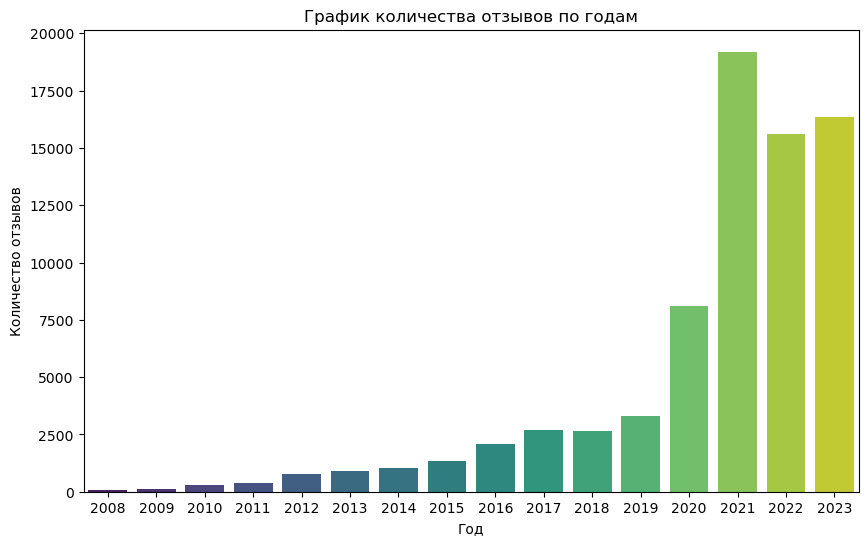

In [ ]:
reviews_by_year = defaultdict(int)

for date_str in date:
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    year = date_obj.strftime("%Y")
    reviews_by_year[year] += 1

data = {'Год': list(reviews_by_year.keys())[::-1], 'Количество отзывов': list(reviews_by_year.values())[::-1]}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Год', y='Количество отзывов', data=df, palette='viridis');
plt.title('График количества отзывов по годам');

Из диаграммы видно, что каждый год число отзывов росло, максимум был в 2021 году, резкий рост отзывов произошел в 2020 и 2021 годах. Это может быть связано с ростом популярности банка

In [ ]:
pd.Series(rating).value_counts()

5        37378
1        25544
2         5360
4         4040
3         2566
4.759       40
1.466       22
3.388       16
dtype: int64

Видим, что были отзывы с нецелыми оценками

In [ ]:
for rate in range(len(rating)):
    if rating[rate] == '3.388':
        rating[rate] = 3
    if rating[rate] == '4.759':
        rating[rate] = 5
    if rating[rate] == '1.466':
        rating[rate] = 1
    else:
        rating[rate] = int(rating[rate])

print(rating[-150:])
# with open('review_rating.json', 'w') as file:
#     json.dump(rating, file)
# print("Содержимое списка записано в файл 'review_rating.json'.")

[5, 1, 5, 4, 5, 2, 3, 5, 5, 4, 5, 5, 5, 5, 1, 3, 5, 1, 5, 3, 5, 5, 5, 4, 2, 5, 1, 5, 4, 5, 2, 3, 5, 5, 1, 4, 5, 1, 3, 2, 5, 5, 4, 4, 5, 1, 1, 4, 1, 4, 5, 3, 3, 5, 4, 5, 1, 3, 1, 1, 4, 5, 1, 3, 2, 5, 5, 4, 4, 5, 1, 1, 4, 1, 4, 5, 3, 3, 5, 4, 5, 1, 3, 1, 5, 5, 3, 3, 5, 5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 1, 1, 3, 5, 1, 1, 1, 1, 5, 5, 5, 3, 3, 5, 5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 1, 1, 3, 5, 1, 1, 1, 1, 5, 1, 5, 5, 5, 1, 1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1]


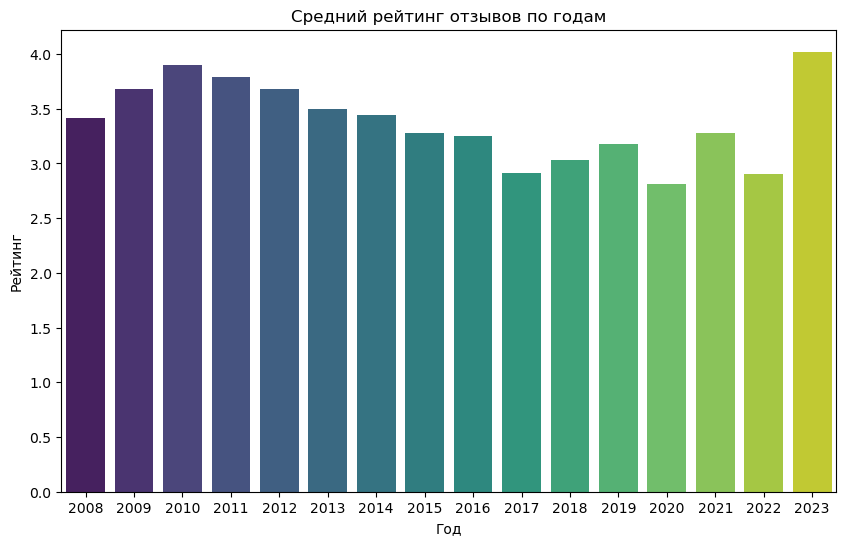

In [ ]:
years = [datetime.strptime(date_str, "%Y-%m-%d").year for date_str in date]

data = {'Год': years, 'Рейтинг': rating}
df = pd.DataFrame(data)

mean_ratings_by_year = df.groupby('Год')['Рейтинг'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Год', y='Рейтинг', data=mean_ratings_by_year, palette='viridis');
plt.title('Средний рейтинг отзывов по годам');

В целом по каждому году средний рейтинг от 3 до 3.5. В 2023 году средний рейтинг был максимальный за все года

Запишем содержимое отзывов в файл review_decription.json

In [ ]:
# with open('review_description.json', 'w') as file:
#     json.dump(review, file)
# print("Содержимое списка записано в файл 'review_description.json'.")

Содержимое списка записано в файл 'review_description.json'.


Запишем рейтинги отзывов в файл review_rating.json

In [ ]:
# with open('review_rating.json', 'w') as file:
#     json.dump(rating, file)
# print("Содержимое списка записано в файл 'review_rating.json'.")

Содержимое списка записано в файл 'review_rating.json'.


In [ ]:
print(review[-2])
print(rating[-2])

Получил предложение от банка, заполнил анкету, отправил. После получения карты позвонил в центр обслуживания, уточнил все интересующие меня вопросы, а именно: покупки безналом и беспроцентный период. Все доступно объяснили. Активировал карту. Пользуюсь картой 3 месяца только &quot;грейсом&quot;(0% до 55 дней при безналичном расчете), с помощью интернет-банка всегда вижу, сколько необходимо оплатить и до какого числа. Переплатил только 590 руб. (плата за ежегодное обслуживание). Недавно мне увеличили лимит по карте. В общем, все устраивает. :)
5


# Загрузка из файлов отзывов и оценок

In [ ]:
with open('review_description.json', 'r') as file:
    review = json.load(file)
print(review[-2])

Получил предложение от банка, заполнил анкету, отправил. После получения карты позвонил в центр обслуживания, уточнил все интересующие меня вопросы, а именно: покупки безналом и беспроцентный период. Все доступно объяснили. Активировал карту. Пользуюсь картой 3 месяца только &quot;грейсом&quot;(0% до 55 дней при безналичном расчете), с помощью интернет-банка всегда вижу, сколько необходимо оплатить и до какого числа. Переплатил только 590 руб. (плата за ежегодное обслуживание). Недавно мне увеличили лимит по карте. В общем, все устраивает. :)


In [ ]:
with open('review_rating.json', 'r') as file:
    rating = json.load(file)
print(rating[-2])

5


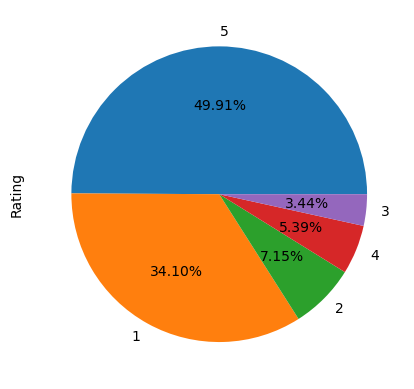

In [ ]:
pd.Series(rating).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('Rating');

# Необходимо будет выполнить балансировку классов

Поработаем с текстовыми отзывами, удалим стоп слова, приведем к нижнему регистру, удалим знаки пунктуации и выполним лемматизацию

In [ ]:
stop_words = stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[a-zA-Z]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word not in stop_words and word not in string.punctuation]
    processed_text = ' '.join(tokens)

    return processed_text
review = [preprocess_text(rev) for rev in review]
review[-2]

In [ ]:
# with open('review_description_preprocess.json', 'w') as file:
#     json.dump(review, file)
# print("Содержимое списка записано в файл 'review_description_preprocess.json'.")

Содержимое списка записано в файл 'review_description_preprocess.json'.


# Загрузка обработанных отзывов из файла

In [ ]:
with open('review_description_preprocess.json', 'r') as file:
    review = json.load(file)
print(review[-2])

получить предложение банк заполнить анкета отправить получение карта позвонить центр обслуживание уточнить интересовать вопрос именно покупка безнал беспроцентный период доступно объяснить активировать карта пользоваться карта 3 месяц грейс 0 55 день безналичный расчёт помощь интернет-банка видеть сколько необходимо оплатить какой число переплатить 590 руб плата ежегодный обслуживание недавно увеличить лимит карта общий устраивать


Самые часто встречаемые слова в отзывах

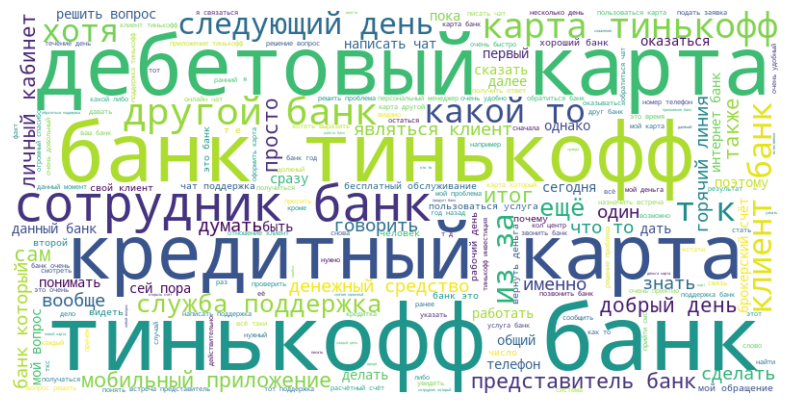

In [ ]:
text = " ".join(review)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Облака слов для каждого класса

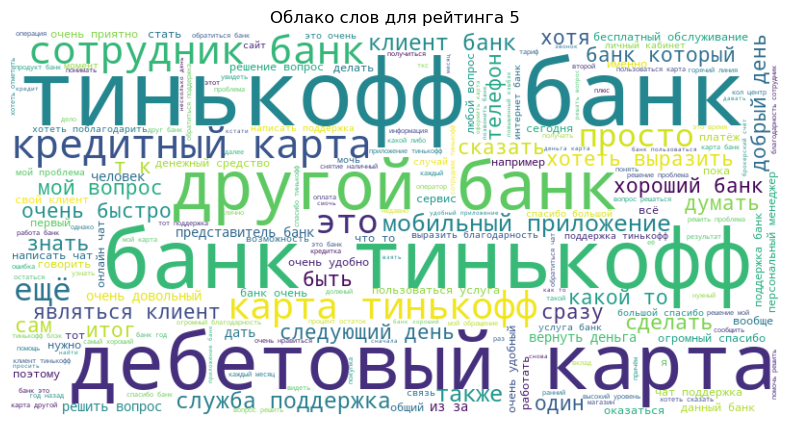

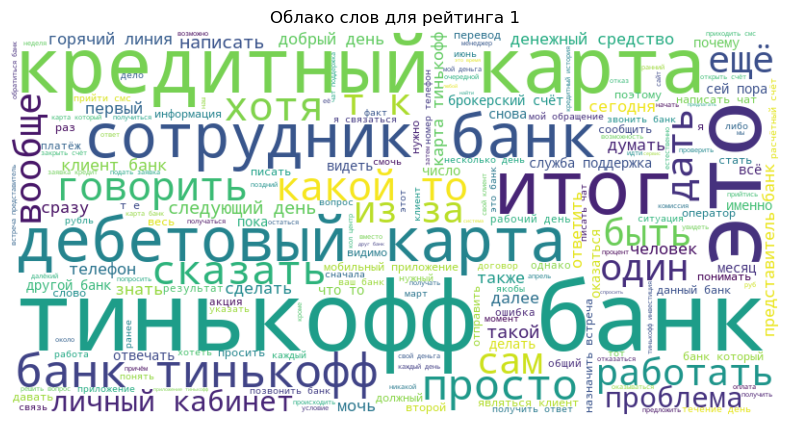

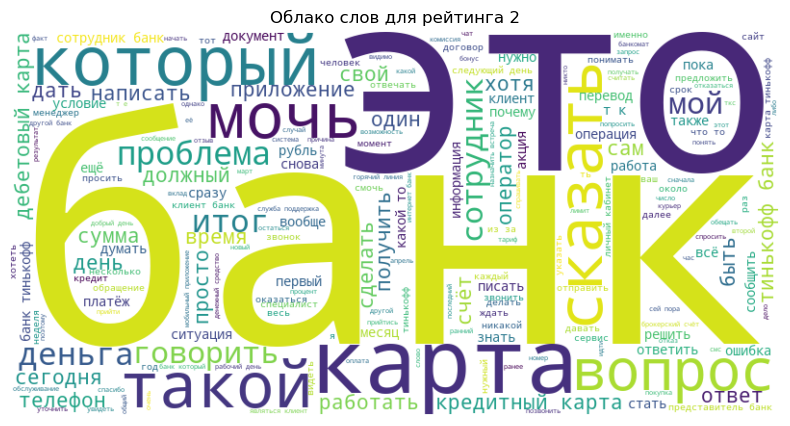

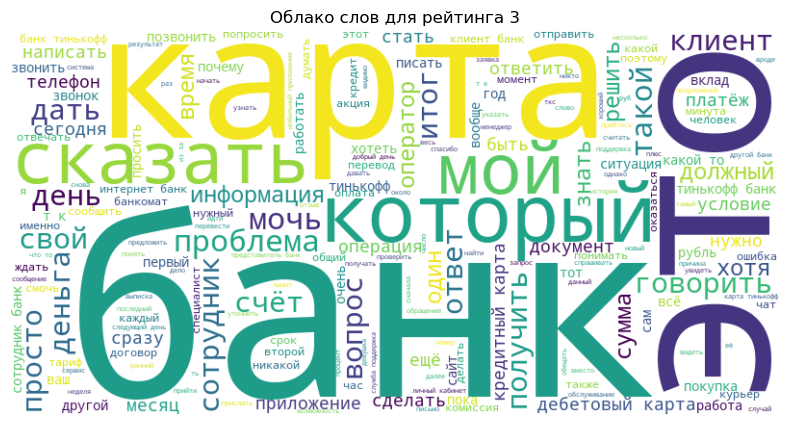

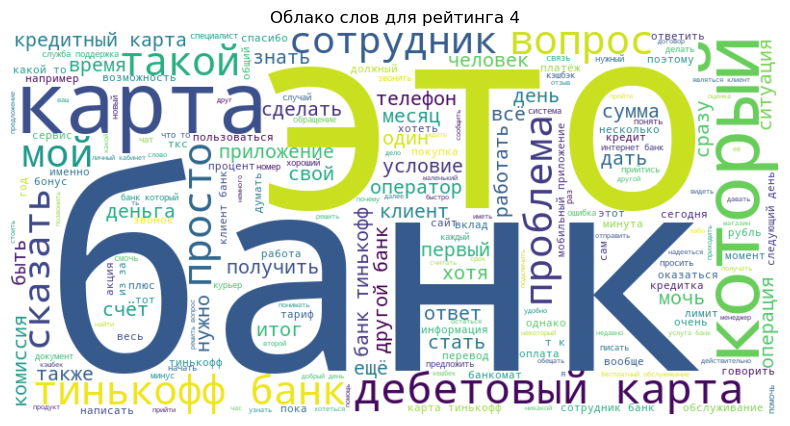

In [ ]:
reviews_by_rating = {}

for i in range(len(review)):
    rating_cur = rating[i]
    review_cur = review[i]

    if rating_cur not in reviews_by_rating:
        reviews_by_rating[rating_cur] = []

    reviews_by_rating[rating_cur].append(review_cur)

for rating, reviews_list in reviews_by_rating.items():
    text = " ".join(reviews_list)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Облако слов для рейтинга {rating}')
    plt.axis('off')
    plt.show()

в каждом классе одинаковые, ключевые слова

# Векторизация

In [ ]:
vectorizer = TfidfVectorizer()
def vectorize(review, vectorizer):
    review_tfidf = vectorizer.fit_transform(review)
    return review_tfidf
review_tfidf = vectorize(review, vectorizer)

# Балансировка через SMOTE

In [ ]:
def balance(review, rating):
    oversample = SMOTE()
    review_oversample, rating_oversample = oversample.fit_resample(review, rating)
    return review_oversample, rating_oversample
review_oversample, rating_oversample = balance(review_tfidf, rating)

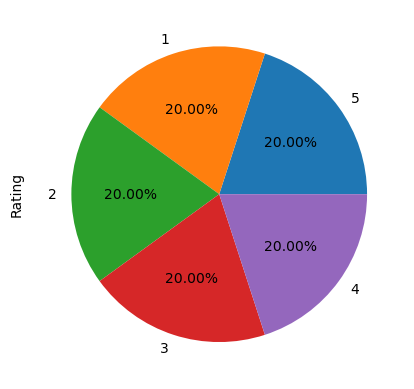

In [ ]:
pd.Series(rating_oversample).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('Rating');

In [ ]:
print(f'Количествое отзывов и оценок после балансировки: {review_oversample.shape[0]}, {len(rating_oversample)}')
print(review_oversample.shape)

Количествое отзывов и оценок после балансировки: 187090, 187090
(187090, 74789)


# Построим модели, будем использовать review_tfidf (т.е еще несбалансированные классы)

In [ ]:
def train_run_models(X, y):
    metrics = {
        'Accuracy': make_scorer(accuracy_score),
        'Precision': make_scorer(precision_score, average='macro'),
        'Recall': make_scorer(recall_score, average='macro'),
        'F1-Score': make_scorer(f1_score, average='macro')
    }

    models = [
        ('PassiveAggressiveClassifier', PassiveAggressiveClassifier()),
        ('RidgeClassifier', RidgeClassifier()),
        ('Наивный Байесовский классификатор', MultinomialNB()),
        ('Логистическая регрессия', LogisticRegression()),
        ('Мультиномиальный наивный Байес', ComplementNB()),
        ('Метод опорных векторов с линейным ядром', LinearSVC()),
        ('Stochastic Gradient Descent', SGDClassifier())
            ]

    acc_dict = {}
    for name, model in models:
        model_scores = {}

        start_time = time.time()

        for metric_name, scorer in metrics.items():
            cv_results = cross_val_score(model, X, y, cv=5, scoring=scorer, n_jobs=-1)
            model_scores[metric_name] = cv_results.mean()

        end_time = time.time()
        training_time = round(end_time - start_time, 2)

        model_scores['Training Time'] =  training_time
        acc_dict[name] = model_scores
        print(f'{name} обучена за {training_time}')

    acc_df = pd.DataFrame.from_dict(acc_dict, orient='index')
    display(acc_df)

In [ ]:
%%time
train_run_models(review_tfidf, rating)

PassiveAggressiveClassifier обучена за 56.91
RidgeClassifier обучена за 94.2
Наивный Байесовский классификатор обучена за 4.1
Логистическая регрессия обучена за 231.76
Мультиномиальный наивный Байес обучена за 3.19
Метод опорных векторов с линейным ядром обучена за 51.95
Stochastic Gradient Descent обучена за 16.17


,Accuracy,Precision,Recall,F1-Score,Training Time
PassiveAggressiveClassifier,0.711789,0.412225,0.401274,0.401005,56.91
RidgeClassifier,0.787584,0.518461,0.387621,0.367005,94.20
Наивный Байесовский классификатор,0.779407,0.310586,0.368484,0.336143,4.10
Логистическая регрессия,0.789478,0.453881,0.397159,0.377851,231.76
Мультиномиальный наивный Байес,0.781234,0.389142,0.373232,0.341689,3.19
Метод опорных векторов с линейным ядром,0.764906,0.442492,0.401395,0.394819,51.95
Stochastic Gradient Descent,0.804204,0.428118,0.384906,0.350889,16.17


Wall time: 7min 38s


Наилучший результат показала модель Stochastic Gradient Descent (лучшие метрики и быстрое время обучения), Наивный Байесовский классификатор и Мультиномиальный наивный Байес обучаются гораздо быстрее остальных моделей

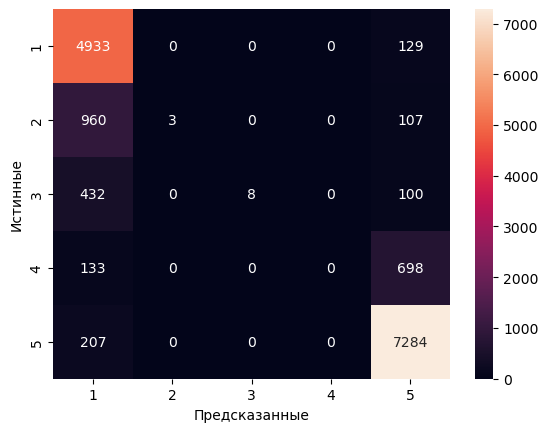

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_tfidf, rating, test_size=0.2, random_state=22)

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)

y_pred = sgd_classifier.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.show()

Матрица ошибок демонстрирует, что лучше всего определяются отзывы с рейтингом 1 и 5 (неудивительно, ведь их в разы больше, чем остальных), а модель часто путает остальные рейтинги с 1 и 5 рейтингами

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84      5062
           2       1.00      0.00      0.01      1070
           3       1.00      0.01      0.03       540
           4       0.00      0.00      0.00       831
           5       0.88      0.97      0.92      7491

    accuracy                           0.82     14994
   macro avg       0.72      0.39      0.36     14994
weighted avg       0.79      0.82      0.75     14994



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Теперь же будем использовать сбалансированные классы

In [ ]:
%%time
train_run_models(review_oversample, rating_oversample)

PassiveAggressiveClassifier обучена за 115.68
RidgeClassifier обучена за 416.29
Наивный Байесовский классификатор обучена за 12.66
Логистическая регрессия обучена за 547.07
Мультиномиальный наивный Байес обучена за 12.94
Метод опорных векторов с линейным ядром обучена за 200.49
Stochastic Gradient Descent обучена за 55.97


,Accuracy,Precision,Recall,F1-Score,Training Time
PassiveAggressiveClassifier,0.947571,0.950236,0.947741,0.946024,115.68
RidgeClassifier,0.916324,0.920639,0.916322,0.913279,416.29
Наивный Байесовский классификатор,0.798108,0.811516,0.798106,0.788429,12.66
Логистическая регрессия,0.861516,0.865802,0.861514,0.857742,547.07
Мультиномиальный наивный Байес,0.845096,0.848660,0.845095,0.840653,12.94
Метод опорных векторов с линейным ядром,0.930873,0.935523,0.930871,0.928287,200.49
Stochastic Gradient Descent,0.782335,0.781063,0.782729,0.779366,55.97


Wall time: 22min 41s


На балансированных данных практически все показатели выросли, особенно хорошо проявили себя метод опорных векторов с линейным ядром, RidgeClassifier, PassiveAggressiveClassifier

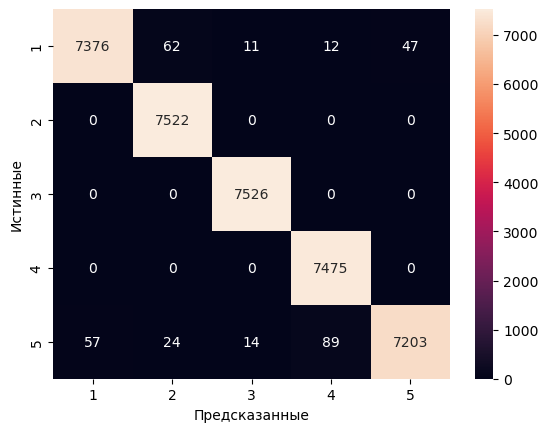

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_oversample, rating_oversample, test_size=0.2, random_state=42)

pa_classifier = PassiveAggressiveClassifier()
pa_classifier.fit(X_train, y_train)

y_pred = pa_classifier.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99      7508
           2       0.99      1.00      0.99      7522
           3       1.00      1.00      1.00      7526
           4       0.99      1.00      0.99      7475
           5       0.99      0.98      0.98      7387

    accuracy                           0.99     37418
   macro avg       0.99      0.99      0.99     37418
weighted avg       0.99      0.99      0.99     37418



Сбалансированые классы отлично помогли улучшить модель, все рейтинги отлично определяются

# Теперь сбалансируем классы путем удаления отзывов до наименьшего значения

# Балансировка через RandomUnderSampler()

In [ ]:
undersampler = RandomUnderSampler()
review_undersample, rating_undersample = undersampler.fit_resample(review_tfidf, rating)
print(f'Количествое отзывов и оценок после балансировки: {review_undersample.shape[0]}, {len(rating_undersample)}')

Количествое отзывов и оценок после балансировки: 12910, 12910


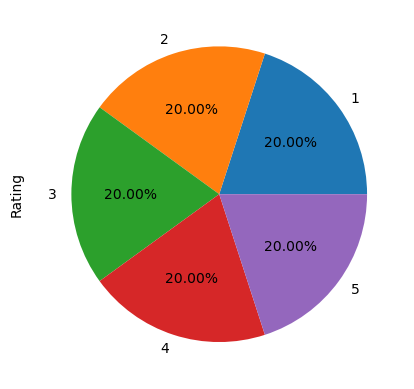

In [ ]:
pd.Series(rating_undersample).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('Rating');

In [ ]:
%%time
train_run_models(review_undersample, rating_undersample)

PassiveAggressiveClassifier обучена за 12.14
RidgeClassifier обучена за 8.25
Наивный Байесовский классификатор обучена за 1.25
Логистическая регрессия обучена за 96.15
Мультиномиальный наивный Байес обучена за 1.73
Метод опорных векторов с линейным ядром обучена за 11.38
Stochastic Gradient Descent обучена за 6.5


,Accuracy,Precision,Recall,F1-Score,Training Time
PassiveAggressiveClassifier,0.540976,0.528745,0.541367,0.521690,12.14
RidgeClassifier,0.544771,0.532639,0.544774,0.530855,8.25
Наивный Байесовский классификатор,0.481565,0.527472,0.481582,0.487293,1.25
Логистическая регрессия,0.524322,0.514695,0.524331,0.515145,96.15
Мультиномиальный наивный Байес,0.529899,0.528104,0.529907,0.527064,1.73
Метод опорных векторов с линейным ядром,0.554686,0.542047,0.554691,0.538880,11.38
Stochastic Gradient Descent,0.528505,0.516986,0.531298,0.518765,6.50


Wall time: 2min 17s


Данный способ балансировки не увенчался успехом

# Проверим, как модель работает на отзывах, введённых вручную

In [ ]:
stop_words = stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()

def preprocess_text(text):Банк не предоставил возможность отсрочки. Обманул. Не рекомендую никому
    text = text.lower()
    text = re.sub(r'[a-zA-Z]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word not in stop_words and word not in string.punctuation]
    processed_text = ' '.join(tokens)

    return processed_text

In [ ]:
input_review = ' '
while input_review != '':
    input_review = input()

    if input_review != '':
        my_review_prep = [preprocess_text(input_review)]
        my_review_tfidf = vectorizer.transform(my_review_prep)

        predicted_rating = pa_classifier.predict(my_review_tfidf)

        print(f"Предсказанная оценка: {predicted_rating[0]}\n")

Банк не предоставил возможность отсрочки. Обманул. Не рекомендую никому
Предсказанная оценка: 1


